In [75]:
from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt

In [69]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [70]:
X_train.shape

(60000, 28, 28)

In [71]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

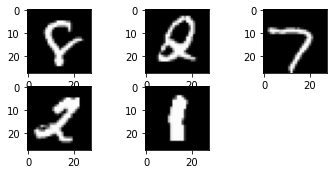

In [72]:
for i in range(331, 336):
    plt.subplot(i)
    random_num = np.random.randint(0,len(X_train))
    plt.imshow(X_train[random_num], cmap=plt.get_cmap('gray'))

In [73]:
#store in shape that keras needs: nrows, ncols, depth
input_shape = (X_train[0].shape,[0, X_train[1].shape[0]], 1)

In [74]:
#Convert to either 0 or 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [76]:
# One hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [81]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)